In [1]:
# -*- coding: utf-8 -*-

# In this script we use a simple classifer called naive bayes and try to predict the violations. 

# 9 Feb 2016
# @author: reyhane_askari
# Universite de Montreal, DIRO

import csv
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
from os import chdir, listdir
from pandas import read_csv
from os import path
from random import randint, sample, seed
from collections import OrderedDict
from pandas import DataFrame, Series
import numpy as np 
import csv
import codecs

%matplotlib inline

colnames = ['old_index','job_id', 'task_idx','sched_cls', 'priority', 'cpu_requested',
            'mem_requested', 'disk', 'violation'] 

tain_path = r'/Users/reyhane.askari/Dropbox/Project_step_by_step/3_create_database/csvs/frull_db_2.csv'

X = pd.read_csv(tain_path, header = None, index_col = False ,names = colnames, skiprows = [0],  usecols = [3,4,5,6,7])
y = pd.read_csv(tain_path, header = None, index_col = False ,names = colnames, skiprows = [0],  usecols = [8])
y = y['violation'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.333, random_state=0)

0.919970149254


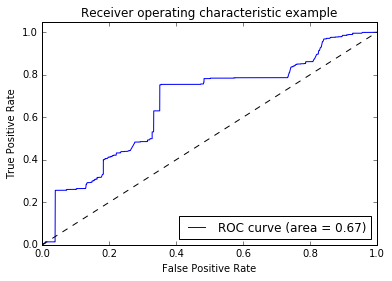

Number of mislabeled points out of a total 67000 points : 5362


In [2]:

from sklearn.naive_bayes import GaussianNB, BernoulliNB
gnb = GaussianNB() #Guassian Naive Bayes
# gnb = BernoulliNB() #Bernoulli Naive Bayes
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_score = gnb.fit(X_train, y_train).predict_proba(X_test)[:,1]
mean_accuracy = gnb.fit(X_train, y_train).score(X_test,y_test,sample_weight=None)
# print(y_score)
print(mean_accuracy)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

plt.legend(loc="lower right")

plt.savefig('/Users/reyhane.askari/Dropbox/Project_step_by_step/3_create_database/naive_bays_guassian.png')

plt.show()


print("Number of mislabeled points out of a total %d points : %d"
    % (X_test.shape[0],(y_test != y_pred).sum()))
from sklearn import metrics
# metrics.precision_score(y_test, y_pred)

In [3]:
from sklearn import metrics
metrics.precision_score(y_test, y_pred)

/Users/reyhane.askari/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [4]:
metrics.recall_score(y_test, y_pred)

0.0

In [5]:
metrics.f1_score(y_test, y_pred)

/Users/reyhane.askari/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [6]:
 metrics.fbeta_score(y_test, y_pred, beta=0.5)  

0.0

In [7]:
 metrics.fbeta_score(y_test, y_pred, beta=1)  

0.0

In [8]:
metrics.fbeta_score(y_test, y_pred, beta=2)

0.0

In [9]:
metrics.precision_recall_fscore_support(y_test, y_pred, beta=0.5) 

/Users/reyhane.askari/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([ 0.91997015,  0.        ]),
 array([ 1.,  0.]),
 array([ 0.93493469,  0.        ]),
 array([61638,  5362]))